In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()

In [22]:
dataset=pd.read_csv('A_Z Handwritten Data.csv')
dataset.rename(columns={'0':'label'}, inplace=True)

#Split the dataset into X and Y
X=dataset.drop('label', axis=1)
y=dataset['label']

Explore data

In [30]:
print('shape',X.shape)
print('columns count:',len(X.iloc[1]))
X.head()
#Data has 372450 examples, 28x28 columns

shape (372450, 784)
columns count: 784


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


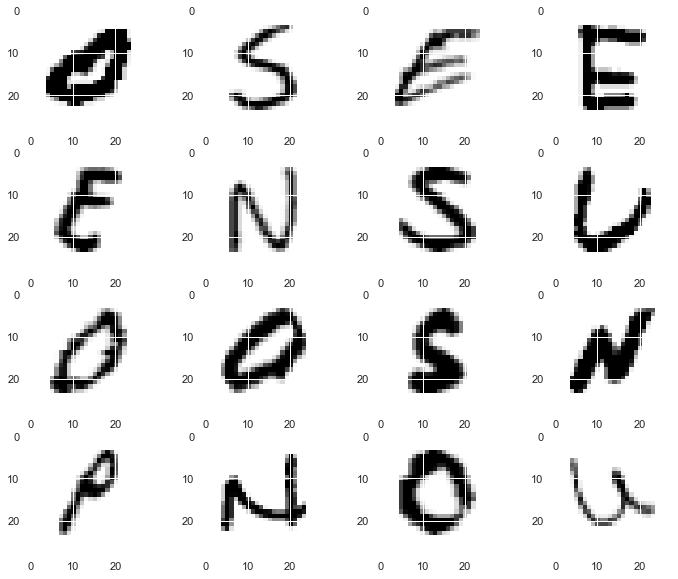

In [33]:
from sklearn.utils import shuffle
X_shuffle=shuffle(X)

plt.figure(figsize=(12,10))
row, columns=4,4
for i in range(16):
    plt.subplot(columns, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28), interpolation='nearest', cmap='Greys')

In [34]:
# Change label to alphabets
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
dataset_alphabets = dataset.copy()
dataset['label'] = dataset['label'].map(alphabets_mapper)


Amount of each labels


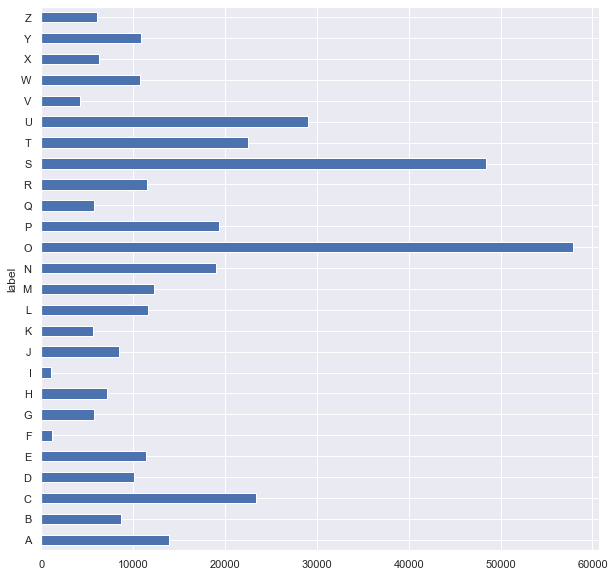

In [38]:
label_size=dataset.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

Data Preparation

In [39]:
X_train, X_test, y_train, y_test=train_test_split(X,y)

#Scale data
standard_scaler=MinMaxScaler()
standard_scaler.fit(X_train)

X_train=standard_scaler.transform(X_train)
X_test=standard_scaler.transform(X_test)

Data after scaler


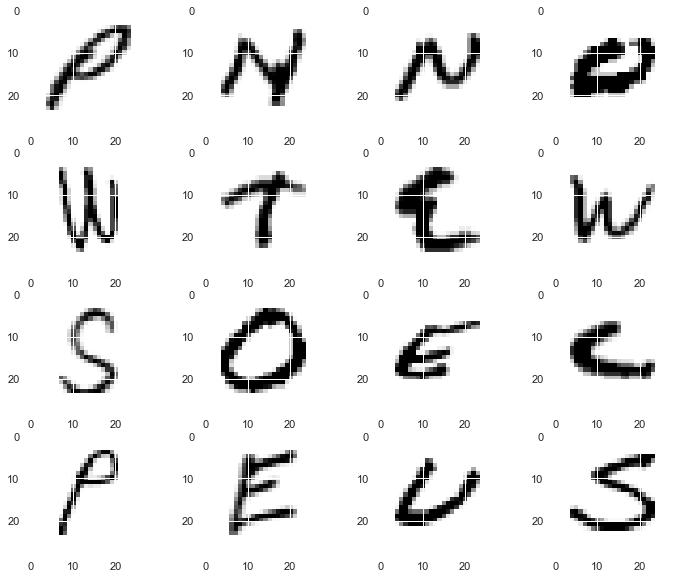

In [40]:
print('Data after scaler')
X_shuffle=shuffle(X_train)

plt.figure(figsize=(12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [46]:
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype('float32')

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

Build the model

In [54]:
cls=Sequential()
cls.add(Conv2D(32,(5,5), input_shape=(28,28,1), activation='relu'))
cls.add(MaxPooling2D(pool_size=(2,2)))
cls.add(Dropout(0.3))
cls.add(Flatten())
cls.add(Dense(len(y.unique()), activation='softmax'))

cls.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=cls.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=1)

scores=cls.evaluate(X_test, y_test, verbose=0)
print('CNN Score:', scores[1])

Epoch 1/20
1397/1397 [==============================] - 58s 41ms/step - loss: 0.2963 - accuracy: 0.9185 - val_loss: 0.1290 - val_accuracy: 0.9666
Epoch 2/20
1397/1397 [==============================] - 58s 41ms/step - loss: 0.1244 - accuracy: 0.9656 - val_loss: 0.0981 - val_accuracy: 0.9740
Epoch 3/20
1397/1397 [==============================] - 56s 40ms/step - loss: 0.1012 - accuracy: 0.9722 - val_loss: 0.0880 - val_accuracy: 0.9771
Epoch 4/20
1397/1397 [==============================] - 56s 40ms/step - loss: 0.0882 - accuracy: 0.9759 - val_loss: 0.0787 - val_accuracy: 0.9792
Epoch 5/20
1397/1397 [==============================] - 56s 40ms/step - loss: 0.0790 - accuracy: 0.9785 - val_loss: 0.0727 - val_accuracy: 0.9811
Epoch 6/20
1397/1397 [==============================] - 55s 39ms/step - loss: 0.0722 - accuracy: 0.9795 - val_loss: 0.0698 - val_accuracy: 0.9818
Epoch 7/20
1397/1397 [==============================] - 55s 39ms/step - loss: 0.0665 - accuracy: 0.9810 - val_loss: 0.0682 -

In [57]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

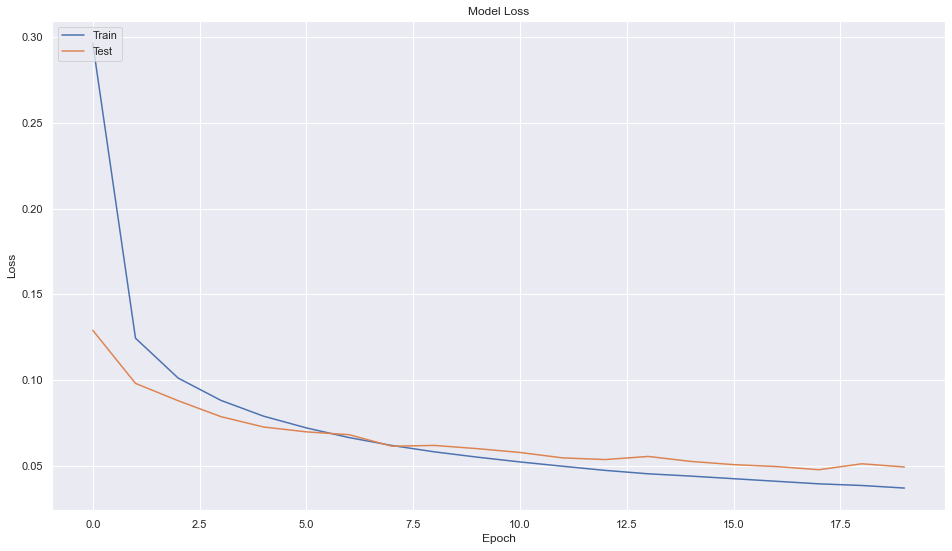

In [59]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<AxesSubplot:>

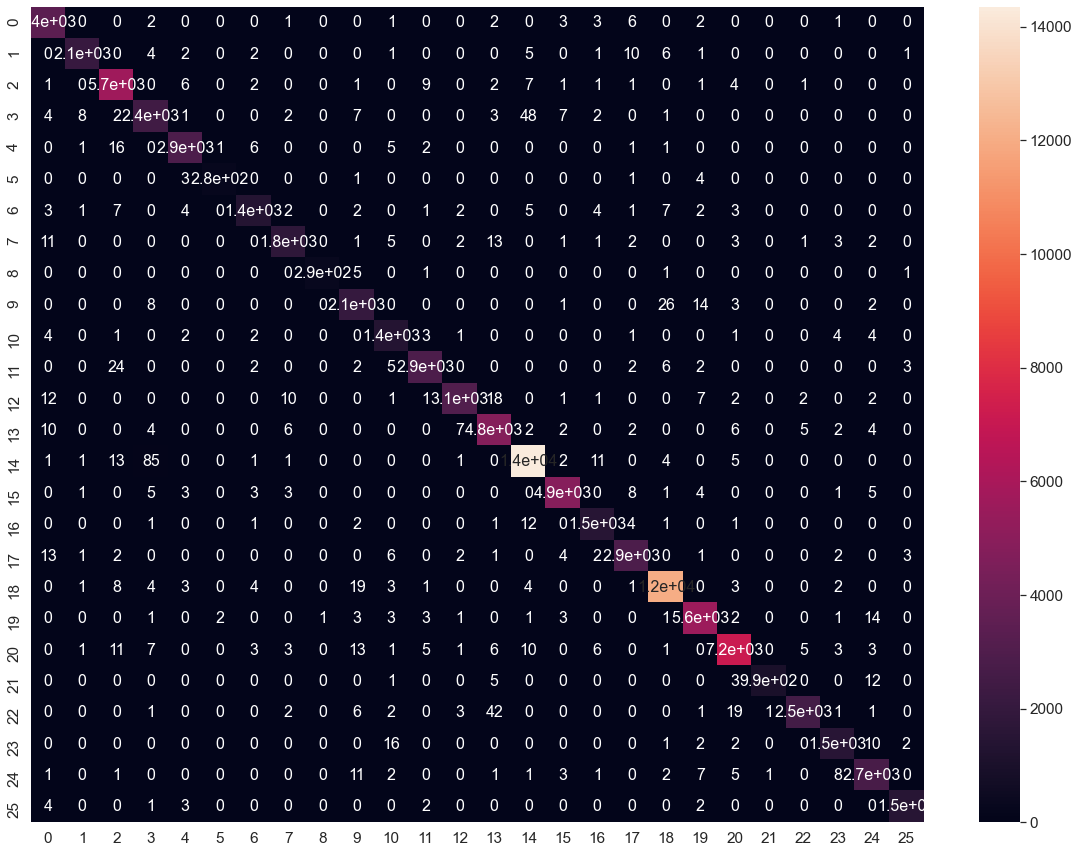

In [60]:
cm=confusion_matrix(y_test.argmax(axis=1), cls.predict(X_test).argmax(axis=1))
df_cm=pd.DataFrame(cm, range(26), range(26))
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4) #for labels
sns.heatmap(df_cm, annot=True, annot_kws={'size':16}) #font size